<a href="https://colab.research.google.com/github/Luthfi27Upi/AlgoritmaStrukturData/blob/master/Week6_19_2E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image as im

In [74]:
# Konvolusi Citra
def convolution2d(image, kernel, stride=1, padding=0):
    # Ambil ukuran (tinggi & lebar) citra dan kernel
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Tambahkan padding di sekeliling citra (kalau padding > 0)
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    # Hitung ukuran hasil konvolusi
    output_h = (image_h + 2 * padding - kernel_h) // stride + 1
    output_w = (image_w + 2 * padding - kernel_w) // stride + 1

    # Siapkan matriks kosong untuk menyimpan hasil
    output = np.zeros((output_h, output_w))

    # Lakukan proses konvolusi
    for y in range(0, output_h):
        for x in range(0, output_w):
            # Ambil bagian kecil citra sesuai ukuran kernel
            y_start, x_start = y * stride, x * stride
            y_end, x_end = y_start + kernel_h, x_start + kernel_w
            region = image_padded[y_start:y_end, x_start:x_end]

            # Kalikan elemen citra dengan kernel lalu jumlahkan
            output[y, x] = np.sum(region * kernel)

    return output

In [75]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,2,2]])

kernel_sobel_x = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

kernel_cany = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
# 5*5 kernel gaussian
kernel_gaussian_blur =(1/256) * np.array([[1, 4, 6, 4, 1],
                                      [4, 16, 24, 16, 4],
                                      [6, 24, 36, 24, 6],
                                      [4, 16, 24, 16, 4],
                                      [1, 4, 6, 4, 1]])
sigma=math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()


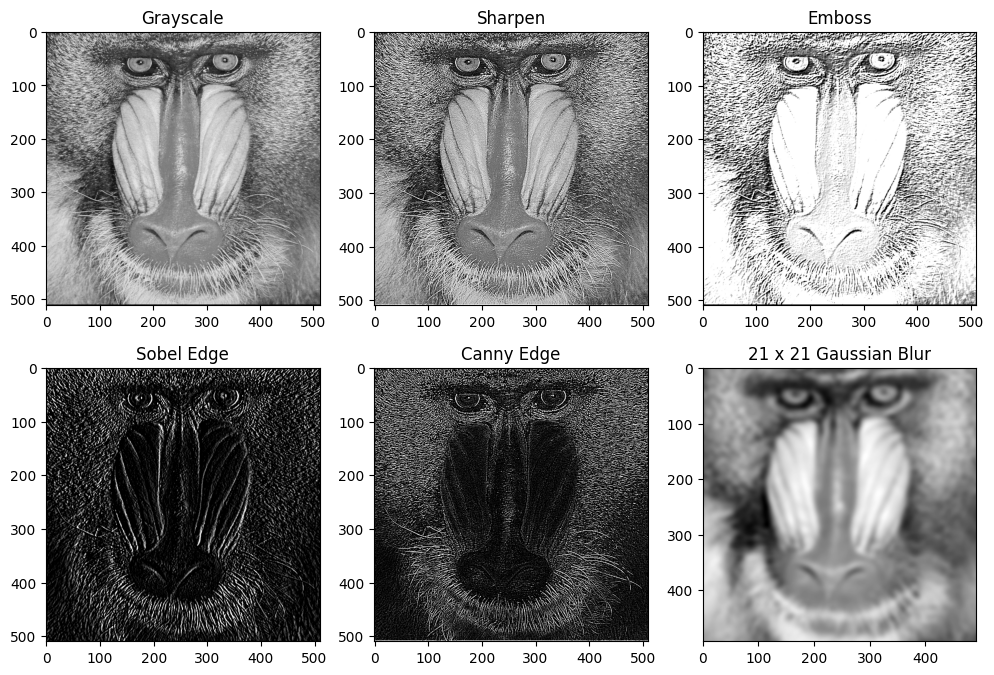

In [76]:
img = cv.imread('/content/drive/MyDrive/Data Kuliah/Image/Image/mandrill.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sharpen = np.clip(convolution2d(img_gray, kernel_sharpen), 0, 255).astype(np.uint8)
emboss  = np.clip(convolution2d(img_gray, kernel_emboss), 0, 255).astype(np.uint8)
sobel_x = np.clip(convolution2d(img_gray, kernel_sobel_x), 0, 255).astype(np.uint8)
canny   = np.clip(convolution2d(img_gray, kernel_cany), 0, 255).astype(np.uint8)
gauss21 = np.clip(convolution2d(img_gray, gauss_kernel), 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,8))
plt.subplot(231), plt.imshow(img_gray, cmap='gray'), plt.title("Grayscale")
plt.subplot(232), plt.imshow(sharpen, cmap='gray'), plt.title("Sharpen")
plt.subplot(233), plt.imshow(emboss, cmap='gray'), plt.title("Emboss")
plt.subplot(234), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel Edge")
plt.subplot(235), plt.imshow(canny, cmap='gray'), plt.title("Canny Edge")
plt.subplot(236), plt.imshow(gauss21, cmap='gray'), plt.title("21 x 21 Gaussian Blur")
plt.show()

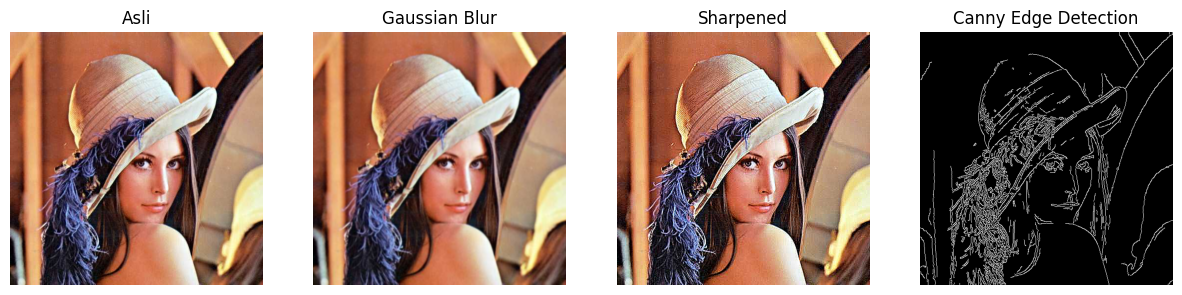

In [77]:
#Percobaan 1 Key

# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2: # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else: # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# --- Pastikan untuk mengganti path gambar ini ---
# --- Sesuaikan dengan lokasi file 'lena.jpg' di Google Drive Anda ---
image_path = "/content/drive/MyDrive/Data Kuliah/Image/Image/lena.jpg"

# Membaca gambar
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Operasi pada gambar
blur = cv2.GaussianBlur(img, (7, 7), 1)
edges = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

# Menampilkan hasil
show_side_by_side(
    [img, blur, sharpened, edges],
    ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"]
)

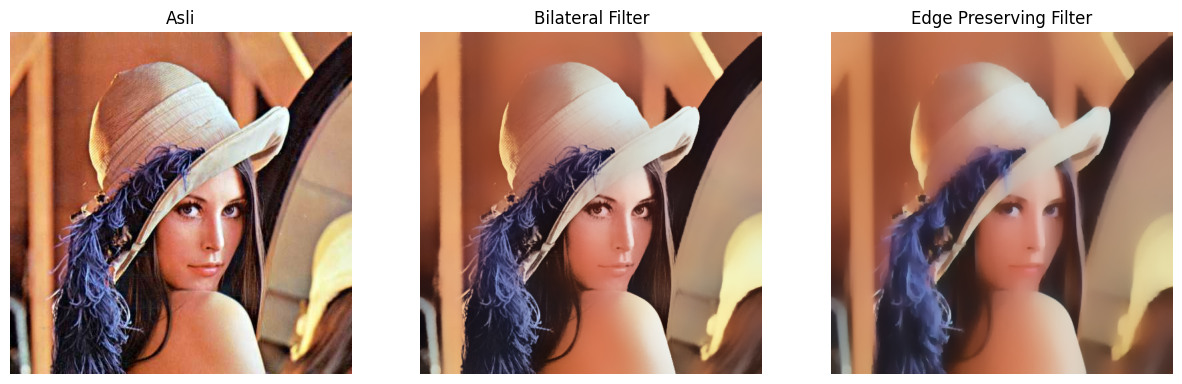

In [78]:
# Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv2.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv2.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

# Menampilkan hasil
show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

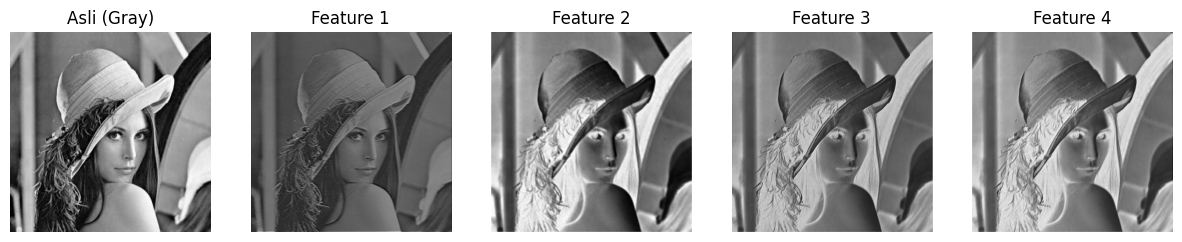

In [68]:
#Percobaan 3 Luthfi

import torch
import torch.nn as nn

# Fungsi untuk menampilkan gambar berdampingan
def show_side_by_side(images, titles):
    plt.figure(figsize=(15,8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(np.array(img).shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# ==========================
# Load gambar
# ==========================
img = cv.imread('/content/drive/MyDrive/Data Kuliah/Image/Image/lena.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# ==========================
# Definisi CNN sederhana
# ==========================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)  # 4 filter acak

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# ==========================
# Ubah gambar ke tensor
# ==========================
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# ==========================
# Hasil CNN (feature maps)
# ==========================
with torch.no_grad():
    features = model(img_tensor)

# Konversi tiap channel feature map jadi numpy
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]

# ==========================
# Visualisasi hasil
# ==========================
show_side_by_side(
    [img_gray] + feature_maps,
    ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))]
)


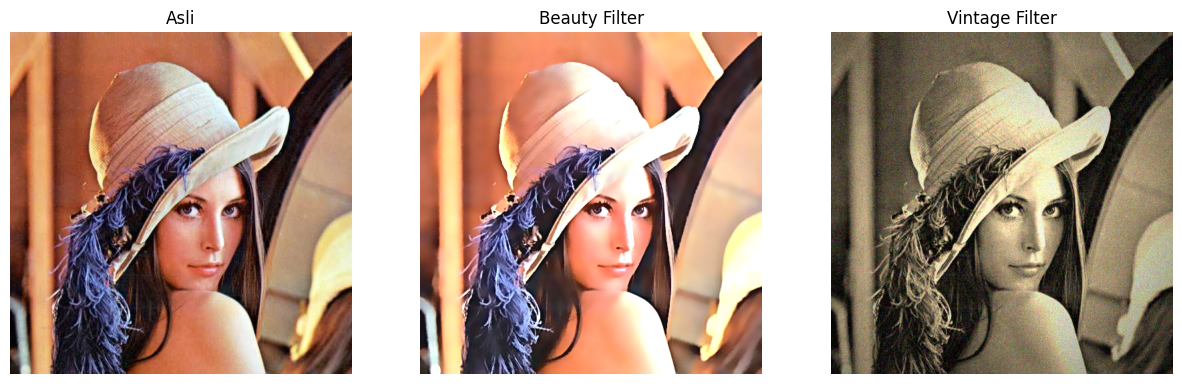

In [72]:
#Percobaan 4 Luthfi

# Fungsi untuk menampilkan gambar berdampingan
def show_side_by_side(images, titles):
    plt.figure(figsize=(15,8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# ====================
# Load gambar
# ====================
img = cv.imread('/content/drive/MyDrive/Data Kuliah/Image/Image/lena.jpg')

# ====================
# 1. Beauty Filter
# ====================

# Step 1: smoothing dengan bilateral filter (melembutkan kulit)
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: brightness & contrast
alpha = 1.2  # contrast
beta = 15    # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)


# ====================
# 2. Old/Vintage Filter
# ====================

# Step 1: sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: noise / grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)


# ====================
# Tampilkan hasil
# ====================
show_side_by_side(
    [img, beauty, old_img],
    ["Asli", "Beauty Filter", "Vintage Filter"]
)


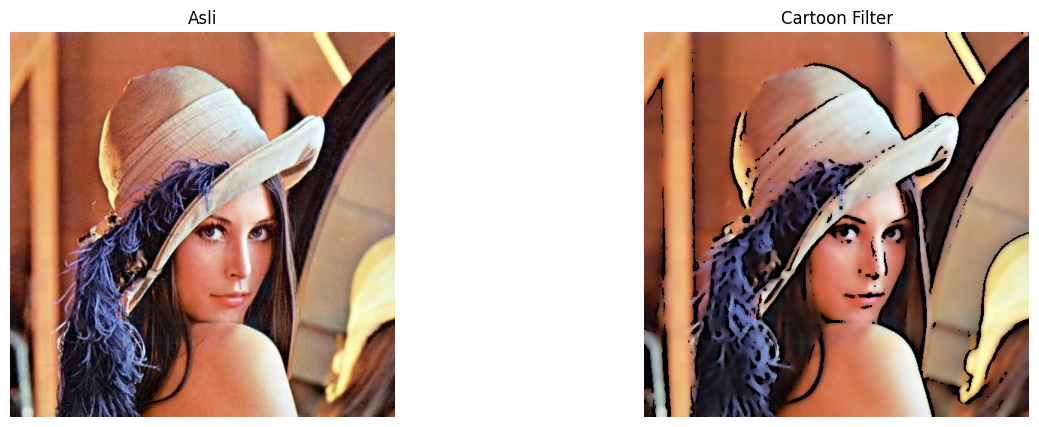

In [79]:
#Percobaan 5 Fahri
# Filter Anime / Cartoon

# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, 7)
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

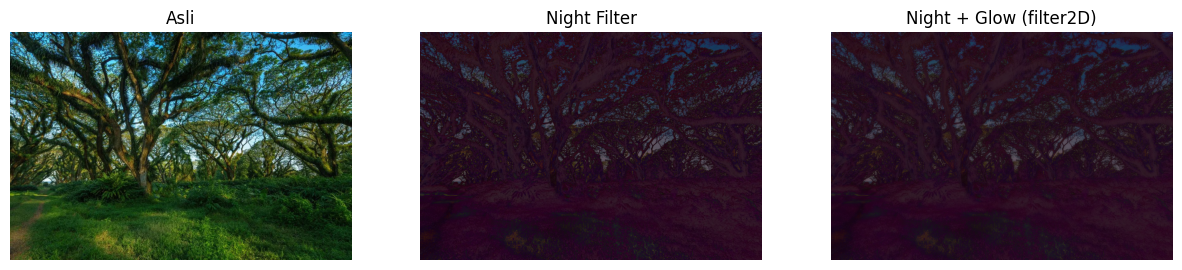

In [80]:
#Percobaan 6 Fahri
# Night Filter

# --- Ganti path gambar ini jika Anda menggunakan gambar yang berbeda ---
img = cv.imread('/content/drive/MyDrive/Data Kuliah/Image/Image/djawatan.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv2.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv2.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv2.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv2.addWeighted(night, 0.7, glow, 0.3, 0)

# Menampilkan hasil
show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

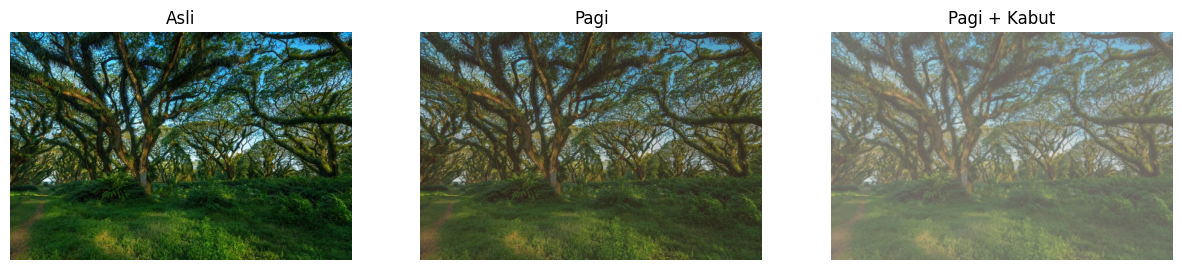

In [64]:
#Percobaan 7 Luthfi

# Fungsi untuk menampilkan gambar berdampingan
def show_side_by_side(images, titles):
    plt.figure(figsize=(15,8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:  # BGR to RGB
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# ==========================
# Load gambar
# ==========================
img = cv.imread('/content/drive/MyDrive/Data Kuliah/Image/Image/djawatan.jpg')

# ==========================
# Step 1: Kurangi kontras & cerahkan
# ==========================
alpha = 0.9  # contrast
beta = 20    # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ==========================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ==========================
warm_tint = np.full_like(soft, (40, 70, 120))  # BGR (biru,hijau,merah)
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ==========================
# Step 3: Tambahkan haze (kabut tipis)
# ==========================
# Kernel Gaussian untuk efek blur/kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T
kabut = cv.filter2D(pagi, -1, kernel)

# Tambahkan lapisan putih tipis sebagai kabut
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

# ==========================
# Tampilkan hasil
# ==========================
show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])
